<a href="https://www.kaggle.com/code/mh0386/autoencoder?scriptVersionId=155332599" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import matplotlib.pyplot as plt
from numpy import float32, random, array, prod, arange, clip
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = cifar10.load_data()
(x_train, _), (x_test, _) = data
x_train = array(x_train)
x_test = array(x_test)

170498071/170498071 [==============================] - 11s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

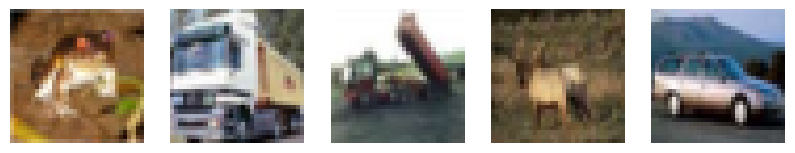

In [4]:
i = 1
plt.figure(figsize=(10, 10))
for image in x_train:
    if i > 5:
        break
    plt.subplot(1, 5, i)
    plt.imshow(image)
    plt.axis("off")
    i += 1
plt.show()

In [ ]:
x_train = x_train.astype(float32) / 255.0
x_test = x_test.astype(float32) / 255.0

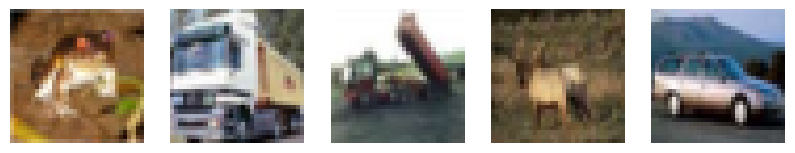

In [6]:
i = 1
plt.figure(figsize=(10, 10))
for image in x_train:
    if i > 5:
        break
    plt.subplot(1, 5, i)
    plt.imshow(image)
    plt.axis("off")
    i += 1
plt.show()

In [7]:
x_train_flattened = x_train.reshape((len(x_train), prod(x_train.shape[1:])))
x_test_flattened = x_test.reshape((len(x_test), prod(x_test.shape[1:])))

In [8]:
x_train_flattened.shape, x_test_flattened.shape

((50000, 3072), (10000, 3072))

In [9]:
encoding_dim = 100  # This is the size of our encoded representations

In [10]:
# Define input image shape
input_img = keras.Input(shape=(3072,))

# Encoder
x = layers.Dense(1000, activation="relu")(input_img)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dense(200, activation="relu")(x)
encoded = layers.Dense(encoding_dim, activation="relu")(x)  # Define encoding dimension

# Decoder
x = layers.Dense(200, activation="relu")(encoded)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
decoded = layers.Dense(3072, activation="sigmoid")(x)  # Match output dimension to input

# Build an autoencoder model
autoencoder = keras.Model(input_img, decoded)

# Compile and train the model
autoencoder.compile(loss="mse", optimizer="adam")

In [11]:
h = autoencoder.fit(x_train_flattened, x_train_flattened, epochs=100, batch_size=64)

Epoch 1/100
782/782 [==============================] - 9s 4ms/step - loss: 0.0315
Epoch 2/100
782/782 [==============================] - 3s 4ms/step - loss: 0.0224
Epoch 3/100
782/782 [==============================] - 3s 4ms/step - loss: 0.0203
Epoch 4/100
782/782 [==============================] - 3s 4ms/step - loss: 0.0184
Epoch 5/100
782/782 [==============================] - 3s 4ms/step - loss: 0.0170
Epoch 6/100
782/782 [==============================] - 3s 4ms/step - loss: 0.0163
Epoch 7/100
782/782 [==============================] - 3s 4ms/step - loss: 0.0158
Epoch 8/100
782/782 [==============================] - 3s 4ms/step - loss: 0.0153
Epoch 9/100
782/782 [==============================] - 3s 4ms/step - loss: 0.0148
Epoch 10/100
782/782 [==============================] - 3s 4ms/step - loss: 0.0144
Epoch 11/100
782/782 [==============================] - 3s 4ms/step - loss: 0.0141
Epoch 12/100
782/782 [==============================] - 3s 4ms/step - loss: 0.0139
Epoch 13/100


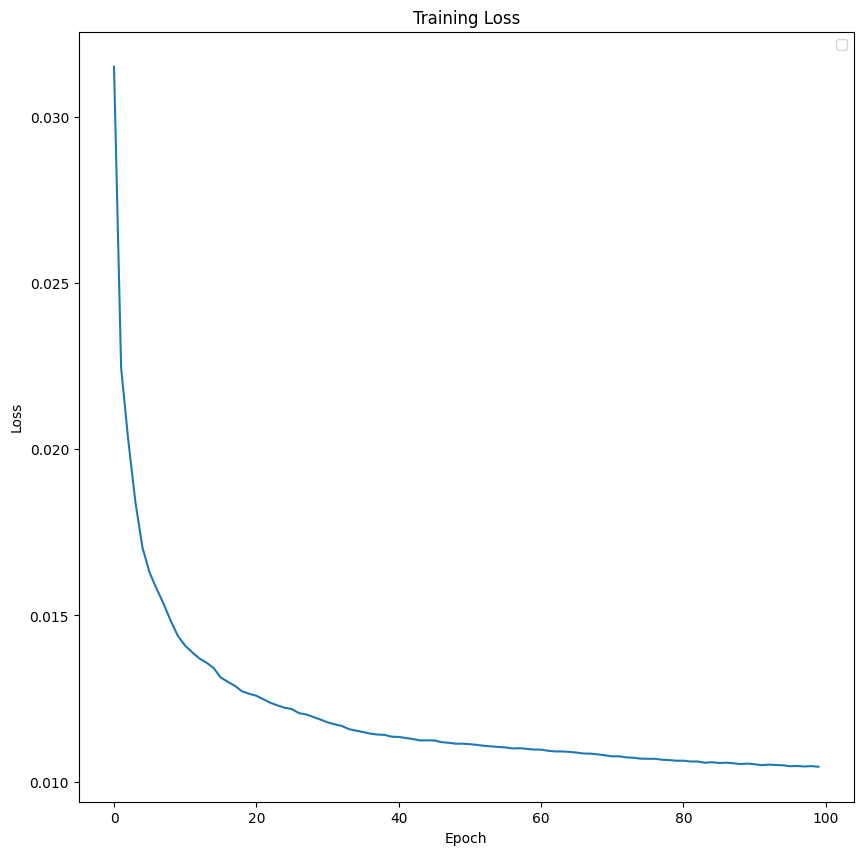

In [12]:
plt.figure(figsize=(10, 10))
plt.plot(arange(0, 100), h.history["loss"])
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [13]:
encoder = keras.Model(input_img, encoded)

In [14]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_l1 = autoencoder.layers[-4]
decoder_l2 = autoencoder.layers[-3]
decoder_l3 = autoencoder.layers[-2]
decoder_l4 = autoencoder.layers[-1]
# as if I am multiplying the last layer with the code layer to get the last output
decoder = keras.Model(
    encoded_input, decoder_l4(decoder_l3(decoder_l2(decoder_l1(encoded_input))))
)

In [15]:
encoded_images = encoder.predict(x_test_flattened)
decoded_images = decoder.predict(encoded_images)

313/313 [==============================] - 0s 1ms/step


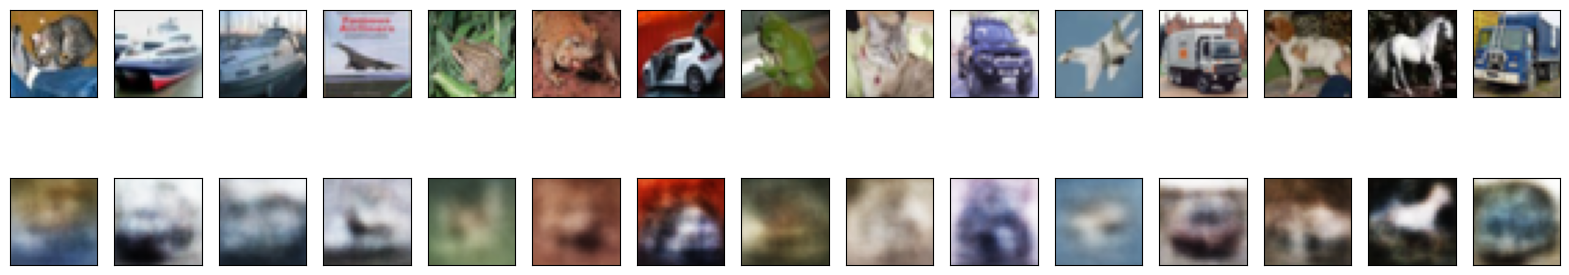

In [16]:
n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_flattened[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

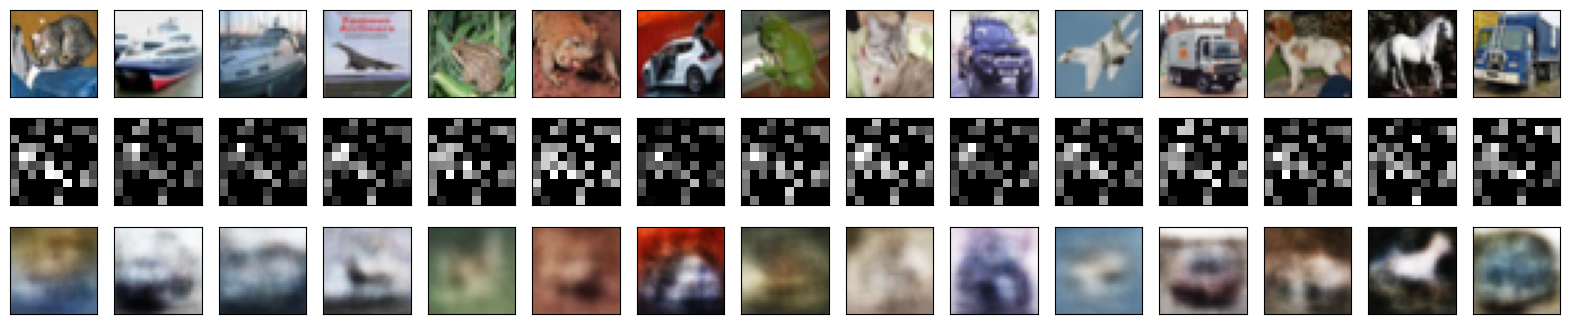

In [17]:
n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_flattened[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_images[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_images[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [18]:
def add_gaussian_noise(images, mu, sigma):
    noise = random.normal(mu, sigma, size=images.shape)
    return clip(images + noise, 0.0, 1.0)

In [19]:
mu, sigma = (
    0,
    0.1,
)  # You can adjust the mean (mu) and standard deviation (sigma) of the Gaussian noise
x_train_noisy = add_gaussian_noise(x_train, mu, sigma)
x_test_noisy = add_gaussian_noise(x_test, mu, sigma)

In [20]:
x_train_noisy.shape, x_test_noisy.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [21]:
x_train_noisy_flattened = x_train_noisy.reshape(
    (len(x_train_noisy), prod(x_train_noisy.shape[1:]))
)
x_test_noisy_flattened = x_test_noisy.reshape(
    (len(x_test_noisy), prod(x_test_noisy.shape[1:]))
)

In [22]:
backend.clear_session()

In [23]:
autoencoder.compile(optimizer="adam", loss="mse")

In [24]:
autoencoder.fit(
    x_train_noisy_flattened,
    x_train_flattened,
    epochs=10,
)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 0.0113
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0113
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0112
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0112
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0112
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0112
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0112
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0112
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0111
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0111


In [25]:
encoded_images_noisy = encoder.predict(x_test_noisy_flattened)
decoded_images_noisy = decoder.predict(encoded_images_noisy)

313/313 [==============================] - 0s 1ms/step


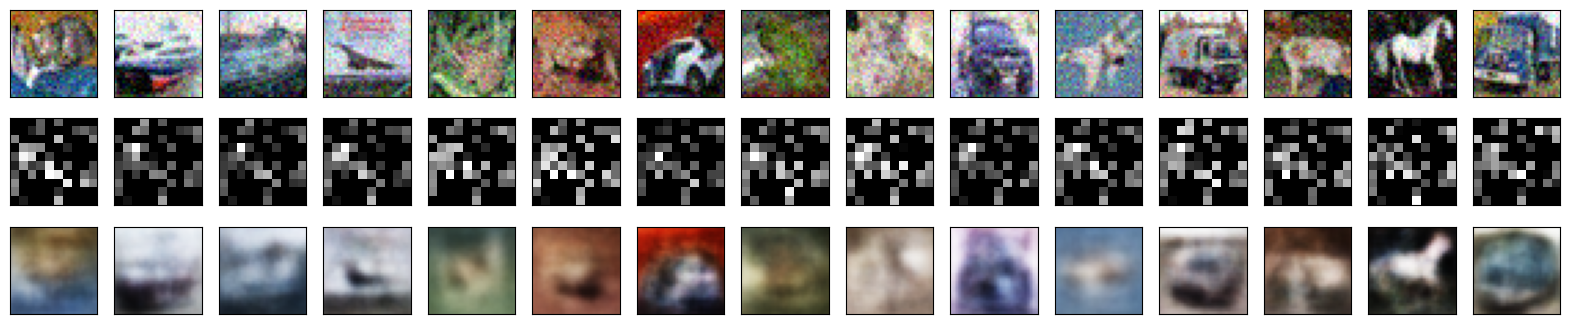

In [26]:
n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_images_noisy[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_images_noisy[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
def add_noise_to_code(encoded, mu, sigma):
    noise = backend.random_normal(shape=backend.shape(encoded), mean=mu, stddev=sigma)
    return encoded + noise

In [28]:
encoded_images = encoder.predict(x_test_flattened)
encoded_images_noisy = add_noise_to_code(encoded_images_noisy, mu, sigma)
decoded_images_noisy = decoder.predict(encoded_images_noisy)

313/313 [==============================] - 0s 1ms/step


In [29]:
encoded_images_noisy = array(encoded_images_noisy)

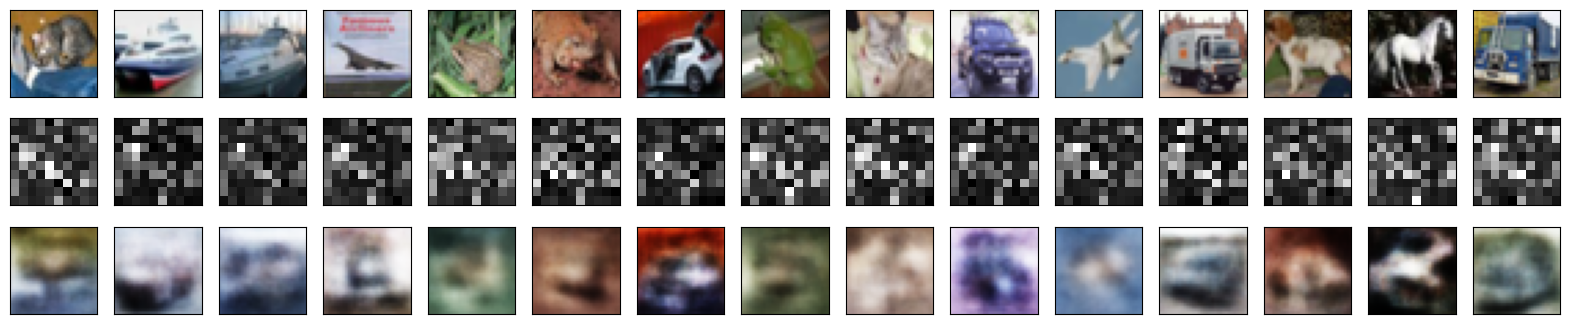

In [30]:
n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_flattened[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_images_noisy[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_images_noisy[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [31]:
# Define the CNN autoencoder architecture
input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = Conv2D(64, (3, 3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation="sigmoid", padding="same")(
    x
)  # Output has 3 channels for RGB

In [32]:
autoencoder = keras.Model(input_img, decoded)

In [33]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [34]:
autoencoder.fit(x_train, x_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 4ms/step - loss: 0.5665
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6745
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 64.4837
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1770.5333
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 12266.1055
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 26850.0527
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 37228.8281
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 60597.7500
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 101329.2266
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 146821.9062
